<a href="https://colab.research.google.com/github/SMNahianIslam/locked-in/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install earthpy
!pip install seaborn
!pip install earthpy-plot
!pip install pandas

ERROR: Could not find a version that satisfies the requirement earthpy-plot (from versions: none)
ERROR: No matching distribution found for earthpy-plot


In [4]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et



# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [9]:


# Import the file as a pandas dataframe
Maarebaap_Prep = pd.read_csv('/content/drive/MyDrive/earth-analytics/data/precipitation/805325-precip-daily-2003-2013.csv')
Maarebaap_Prep.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.00,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.00,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.20,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.10,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.10,,
...,...,...,...,...,...,...,...,...,...
1835,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,20131222 01:00,999.99,[,
1836,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,20131223 00:00,999.99,],
1837,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,20131223 02:00,0.10,,
1838,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,20131229 01:00,999.99,[,


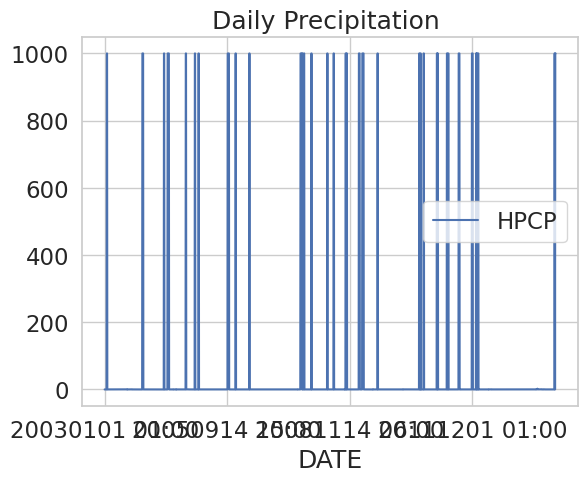

In [10]:
Maarebaap_Prep.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

In [13]:

Maarebaap_Prep["HPCP"].describe()

,HPCP
count,1840.000000
mean,51.192587
std,220.208147
min,0.000000
25%,0.100000
50%,0.100000
75%,0.100000
max,999.990000


In [15]:
Maarebaap_Prep.dtypes

,0
STATION,object
STATION_NAME,object
ELEVATION,float64
LATITUDE,float64
LONGITUDE,float64
DATE,object
HPCP,float64
Measurement Flag,object
Quality Flag,object


In [21]:
# Import data using datetime and no data value
Maarebaap_Prep = pd.read_csv('/content/drive/MyDrive/earth-analytics/data/precipitation/805325-precip-daily-2003-2013.csv',
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       #index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the
Maarebaap_Prep.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


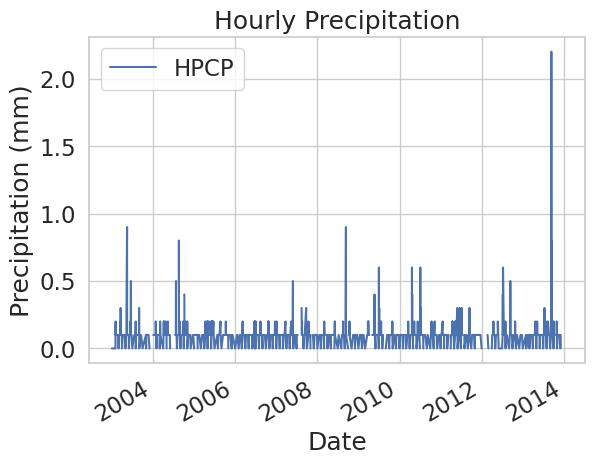

In [30]:
Maarebaap_Prep.plot(y='HPCP', title='Hourly Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

In [27]:
# Remove missing data values
Maarebaap_Prep_clean = Maarebaap_Prep.dropna()

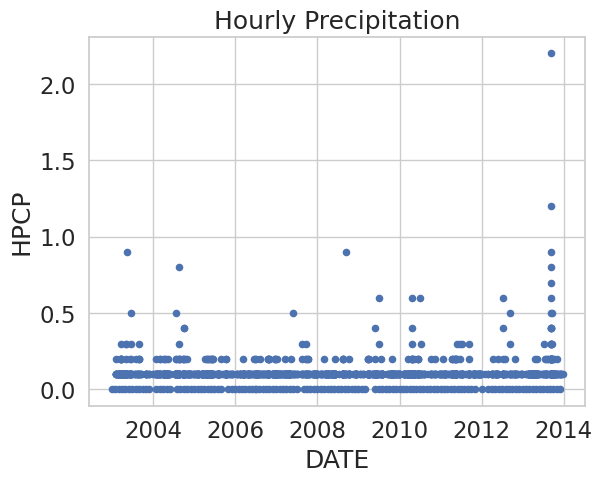

In [33]:
# Plot the data using pandas

Maarebaap_Prep_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()

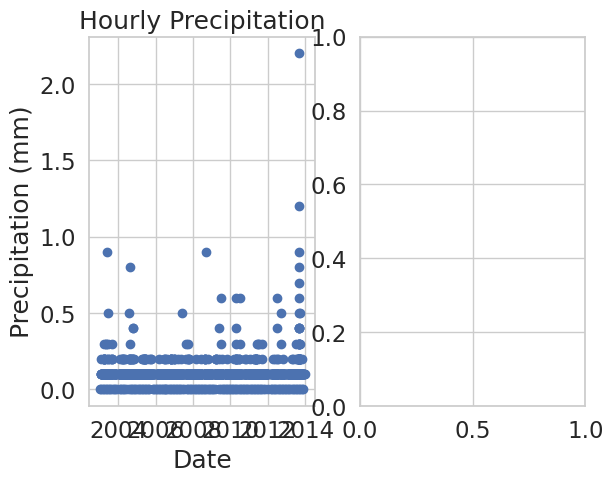

In [38]:
# Plot the data using native matplotlib
f, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(x=Maarebaap_Prep_clean.index.values,
           y=Maarebaap_Prep_clean["HPCP"])
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation (mm)')
ax1.set_title('Hourly Precipitation')


plt.show()